<a href="https://colab.research.google.com/github/WebsterDaka/lab2-html/blob/main/Project_Classifier(Speakers_Rullings).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parliamentary Speaker's Rulings Classification Project

This project aims to develop an automated text classification system to categorize Speaker's Rulings from the National Assembly of Zambia into predefined categories, enhancing accessibility for legal, parliamentary, and public use.


# **1. Business Understanding**
---


## Problem Statement
The National Assembly of Zambia generates substantial volumes of parliamentary proceedings containing Speaker's Rulings on various procedural, disciplinary, and administrative matters. Currently, accessing and categorizing these rulings for legal research, parliamentary reference, and civic education requires extensive manual effort. Legal professionals, researchers, parliamentary staff, and citizens face significant challenges in efficiently locating relevant precedents and understanding patterns in parliamentary decision-making.
### Core Problem:
There is no automated system to classify and categorize Speaker's Rulings from Zambian parliamentary proceedings, making legal and legislative information retrieval inefficient and limiting effective civic education and parliamentary research.

## 1. Business Objectives

### Primary Objectives:
1. To classify parliamentary rulings into a structured system that is simpler to analyze and
evaluate  
2. Organize speakers' rulings to improve accessibility and quick retrieval for legal
professionals, researchers, and public understanding.

### Success Criteria from Business Perspective:
- Reduce time spent by legal professionals searching for relevant rulings by at least 60%
- Enable non-experts to find and understand parliamentary rulings relevant to their interests
- Provide parliamentary staff with consistent categorization for improved procedural reference
- Support academic and policy research through structured access to historical ruling patterns

---
## 2. Data Mining Goals
### Specific Technical Objectives
1. **Build a Multi-class Classification Model:**  
   Develop a machine learning system that automatically categorizes Speaker's Rulings into predefined categories such as:
    - **Procedural Rulings** (e.g., points of order, procedural motions)
    - **Disciplinary Actions** (e.g., member conduct, sanctions)
    - **Administrative Decisions** (e.g., scheduling, resource allocation)
    - **Constitutional Interpretations** (e.g., constitutional questions, legal precedents)
    - **Debate Management** (e.g., time allocation, speaking order)

2. **Implement Natural Language Processing (NLP):**  
   Apply text mining techniques to extract meaningful features from parliamentary text documents, enabling accurate classification.

3. Create automated pipeline for new ruling classification.

**Technical Success Metrics**
* Accuracy: Achieve at least 80% overall classification accuracy across all ruling categories
* Precision: Maintain precision above 75% for each individual category to ensure reliable
categorization
* F1-Score: Target F1-score above 77% for balanced precision-recall performance
---
## 3. Project Success Criteria
### Quantitative Criteria
1. **Model Performance:** Overall classification accuracy ≥ 80%
2. **Processing Speed:** System should classify new documents within 5 seconds

### Business Impact Measures:
- Reduction in manual categorization time
- Increased usage of parliamentary information by researchers and citizens
- Improved consistency in referencing past rulings by parliamentary staff
- Enhanced accessibility of legal and legislative information for civic education

---
## 4. Project Scope
### in Scope:
- Speaker's Rulings from National Assembly of Zambia proceedings
- Text-based classification using parliamentary Hansards and official records
- English language processing
### Out of Scope:
- Rulings from other parliamentary bodies or courts
- Non-English parliamentary proceedings
- Real-time audio/video processing of parliamentary sessions
- Legal advice or interpretation of ruling implications
### Constraints:
- Data availability limited to publicly accessible parliamentary records
- Solution must be cost-effective for potential implementation by parliamentary services
- Timeline constraints require deliverable completion by August 29, 2025



#**2. Data Understanding**

This notebook performs the **Data Understanding** phase for our data mining project using Google Colab.

We work with the **Speaker’s Rulings** dataset and perfom Explorative data analysis (EDA) on the data to gain an understanding on the data

## **Goals**
- Explore structure (shape, columns, types) and preview records.
- Profile data types, basic statistics, and distributions.
- Assess data quality (missing values, duplicates, inconsistencies).
- Summarize early insights and risks that will guide later preparation and modeling.



###**Data sources**
The main source of data for this project is [**The National Assembly Website**](https://www.parliament.gov.zm/publications/rulings)

The Data is publicly available and we perfomed initial data collection by scraping the website using python scripts

The Data is in form of article with a title and abstract text,
We extracted **Title**, **text**, **context** , and **standing orders**

Then we labled each rulling text into a **category** which is our target column




###**Mount Drive for persistence of the Dataset**
This allows to access the files directly and save work permanently.

Run the code cell below. It will prompt you to authorize access to your Google Drive. Follow the on-screen instructions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once mounted, you can see your entire Google Drive by navigating through the "Files" pane on the left. It will appear under the drive/MyDrive/ directory.


### **IMPORTANT NOTE**
For this project, you should create a folder in your Google Drive (e.g., `rullings_classifier_data`) and upload the  datasets into it:
>* `speaker_ruling_classification.csv`


 In this examples below, the file path used points to my own folder structure, for instance:
 >* `/content/drive/MyDrive/rulings_classifier_data`

 **You MUST replace this path with the correct path to the files in YOUR own Google Drive.** You can find the correct path by navigating to the file in the "Files" pane, right-clicking it, and selecting "Copy path".

###**Environtment Setup and Data Loading**

1. Importing the required python libraries
  - **pandas** for handling and exploring data
  - **pyplot** from matplotlib for plotting
2. Load the Speaker's Rulling dataset into a pandas DataFrame using `pd.read_csv()`

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt


#Load dataset into a DataFrame
file_path = "/content/drive/MyDrive/rulings_classifier_data/speaker_ruling_classification.csv"
ruling_df = pd.read_csv(file_path)



###**Basic Structure Analysis**   

In this step, we examine the **basic structure** of the dataset to understand its size and scope.

- **Dataset shape**: Number of rows and columns
- **Total data points**: Rows * Columns.  

This helps us estimate data volume and complexity before diving deeper.


In [ ]:
#Datashape
print("Dataset shape:", ruling_df.shape)

#Number of row (rulings)
print("Number of rows(rulings):", ruling_df.shape[0])

#Number of columns (features)
print("Number of columns(features):", ruling_df.shape[1])

#Total data points
print("Total data points:", ruling_df.shape[0] * ruling_df.shape[1])


Dataset shape: (300, 5)
Number of rows(rulings): 300
Number of columns(features): 5
Total data points: 1500


### **Column Structure Examination**

To better understand the dataset, we analyze its **columns and data types**:

- **`df.info()` summary** showing:  
   - Column names  
   - Number of non-null entries per column  
   - Data types of each column  
   - Memory usage  



In [ ]:
#showing list of columns
print("List of columns:")
for i , col in enumerate(ruling_df.columns,start=1):
  print(f"{i}.{col}")
print("\n")



# showing a concise data summary including datatypes
print("Summary of dataset:")
ruling_df.info()

List of columns:
1.rulingTitle
2.rulingText
3.context
4.categories
5.standingOrder


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rulingTitle    300 non-null    object
 1   rulingText     299 non-null    object
 2   context        300 non-null    object
 3   categories     292 non-null    object
 4   standingOrder  275 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


###**Initial Data Preview**

A preview the dataset to gain a general sense of its content:

- Use **`df.head()`** to view the first records.  
- Use **`df.tail()`** to view the last records.

In [ ]:
#first 5 fow of the datase
ruling_df.head(13).T


,0,1,2,3,4,5,6,7,8,9,10,11,12
rulingTitle,RULING BY THE HONOURABLE SPEAKER ON A POINT OF...,Ruling by the Hon Madam Speaker on the Applica...,RULING BY THE HONOURABLE SPEAKER ON A POINT OF...,RULING BY THE HON MADAM FIRST DEPUTY SPEAKER O...,RULING ON ARTICLE 63 MOTIONS OF CENSURE AND EX...,RULING ON ARTICLE 18 FAIR HEARING IN COMMITTEE...,RULING BY THE HONOURABLE SPEAKER ON ADMINISTRA...,Ruling by the Hon Mr Speaker on a Point of Ord...,RULING BY THE HON SECOND DEPUTY SPEAKER ON A P...,RULING BY THE HONOURABLE SPEAKER ON UNBECOMING...,RULING ON ARTICLE 16 PROPERTY RIGHTS AND FORFE...,Ruling by the Hon Madam Speaker - On a Point o...,RULING BY THE HONOURABLE MADAM SPEAKER ON A FO...
rulingText,"Honourable Members, I am called upon to determ...",Honourable Members will recall that on Wednesd...,"Honourable Members, I am called upon to determ...","Hon Members, I wish to inform the House that o...",A Point of Order sought to restrict a motion o...,A Point of Order challenged whether a Committe...,"Honourable Members, I am called upon to render...","Hon Members will recall that on Thursday, 12th...","Hon Members, the House will recall that on Fri...","Honourable Members, the Chair has noted with d...",The House examined whether a proposed forfeitu...,"Hon Members, the House will recall that on Thu...","Honourable Members, during the heated debate o..."
context,point of order,guidance,point of order,complaint,point of order,point of order,guidance,point of order,point of order,matter of urgent public importance,point of order,point of order,point of order
categories,"constitutional interpretation, administrative ...",constitutional interpretation,"constitutional interpretation, debate management","disciplinary action, procedural ruling",constitutional interpretation,constitutional interpretation,administrative decision,procedural ruling,"disciplinary action, constitutional interpreta...",disciplinary action,constitutional interpretation,procedural ruling,disciplinary action
standingOrder,139,"72, 72",139,"202, 208, 204, 205",139,"139, 226",223,NaN,72,"139, 215, 220",139,65,205


In [ ]:
#last 5 rows of the dataset
ruling_df.tail(5).T

,295,296,297,298,299
rulingTitle,RULING BY THE HONOURABLE MADAM SPEAKER ON THE ...,RULING BY THE HON MADAM SPEAKER ON A POINT OF ...,Ruling by Hon. Mr Speaker on a Point of Order ...,Ruling by the Hon Madam Speaker on the Use of ...,Ruling by Hon. Madam Speaker on a Matter of Ur...
rulingText,"Honourable Members, public trust is the curren...","Hon Members will recall that on Thursday, 3rd ...","Hon Members will recall that on Friday, 19th F...",Honourable Members will recall that on Thursda...,"Hon Members, the House will recall that on Wed..."
context,guidance,point of order,point of order,guidance,matter of urgent public importance
categories,"disciplinary action, administrative decision",procedural ruling,disciplinary action,administrative decision,procedural ruling
standingOrder,203,65,53,"187, 202","135, 51, 135, 135"


###**Categorical Data Analysis**
In this section we dive deeper in the Categorical columns *categories and context* columns to understand the distribution  within each column

####What We'll Analyze:

> - Value counts for each categorical column
> - Number of unique values per column
> - Most and least common categories

In [ ]:
#Count number of occurence for each category

print("Number of occurence for each category:")

categoriesCount = ruling_df['categories']
print(categoriesCount.value_counts())
print("\n")

Number of occurence for each category:
categories
procedural ruling                                                            69
constitutional interpretation                                                50
disciplinary action                                                          45
administrative decision                                                      44
disciplinary action, procedural ruling                                       25
constitutional interpretation, debate management                             11
procedural ruling, debate management                                          8
debate management                                                             8
procedural ruling, administrative decision                                    6
procedural ruling, constitutional interpretation                              6
constitutional interpretation, administrative decision                        5
disciplinary action, debate management                                

In [ ]:
##Counting number of unique values in categories columns

unique_category_values = ruling_df['categories'].unique()
print("unique values in categories columns:")
print(unique_category_values)
print("\n")
print("Number of unique values in categories columns:")
print(len(unique_category_values))

unique values in categories columns:
['constitutional interpretation, administrative decision'
 'constitutional interpretation'
 'constitutional interpretation, debate management'
 'disciplinary action, procedural ruling' 'administrative decision'
 'procedural ruling'
 'disciplinary action, constitutional interpretation, procedural ruling'
 'disciplinary action' 'disciplinary action, debate management'
 'debate management' nan
 'procedural ruling, constitutional interpretation'
 'procedural ruling, administrative decision'
 'procedural ruling, debate management'
 'disciplinary action, constitutional interpretation'
 'constitutional interpretation, debate management, administrative decision'
 'disciplinary action, administrative decision']


Number of unique values in categories columns:
17


In [ ]:
#Count number of occurence for each context

print("Number of occurence for each context:")

contextsCount = ruling_df['context']
print(contextsCount.value_counts())
print("\n")

Number of occurence for each context:
context
point of order                        199
guidance                               46
complaint                              42
matter of urgent public importance     13
Name: count, dtype: int64




In [ ]:
#counting number of occurencies for each context

unique_context_values = ruling_df["context"].unique()
print("unique values in context columns:")
print(unique_context_values)
print("\n")
print("Number of unique values in context columns:")
print(len(unique_context_values))

unique values in context columns:
['point of order' 'guidance' 'complaint'
 'matter of urgent public importance']


Number of unique values in context columns:
4


###**Text Length and Word Count**
This section focuses on fining:
- The text length
- Word count
- Avarage word count for all the columns with paragraph
including **rullingText** and **rullingTitle**



In [ ]:
##creating a new column to hold the text length and column count for rulingTitle

ruling_df['ruling_title_text_length'] = ruling_df['rulingTitle'].str.len()
ruling_df['ruling_title_word_count'] = ruling_df['rulingTitle'].str.split().str.len()

display(ruling_df.head(2))

#finding the avarage word count and text length for the ruling title

avarage_word_count = ruling_df['ruling_title_word_count'].mean()
avarage_text_length = ruling_df['ruling_title_text_length'].mean()
print("\n")

print("Avarage word count: ", avarage_word_count.astype(int))
print("Avarage text length: ", avarage_text_length.astype(int))

,rulingTitle,rulingText,context,categories,standingOrder,ruling_title_text_length,ruling_title_word_count
0,RULING BY THE HONOURABLE SPEAKER ON A POINT OF...,"Honourable Members, I am called upon to determ...",point of order,"constitutional interpretation, administrative ...",139,150,19
1,Ruling by the Hon Madam Speaker on the Applica...,Honourable Members will recall that on Wednesd...,guidance,constitutional interpretation,"72, 72",98,16




Avarage word count:  33
Avarage text length:  203


###**Visual Analysis**
Using pyplot we will Create categorical visualizations
- Bar charts for top categorical variables
- Pie charts for proportional data
- Distribution plots for key categories

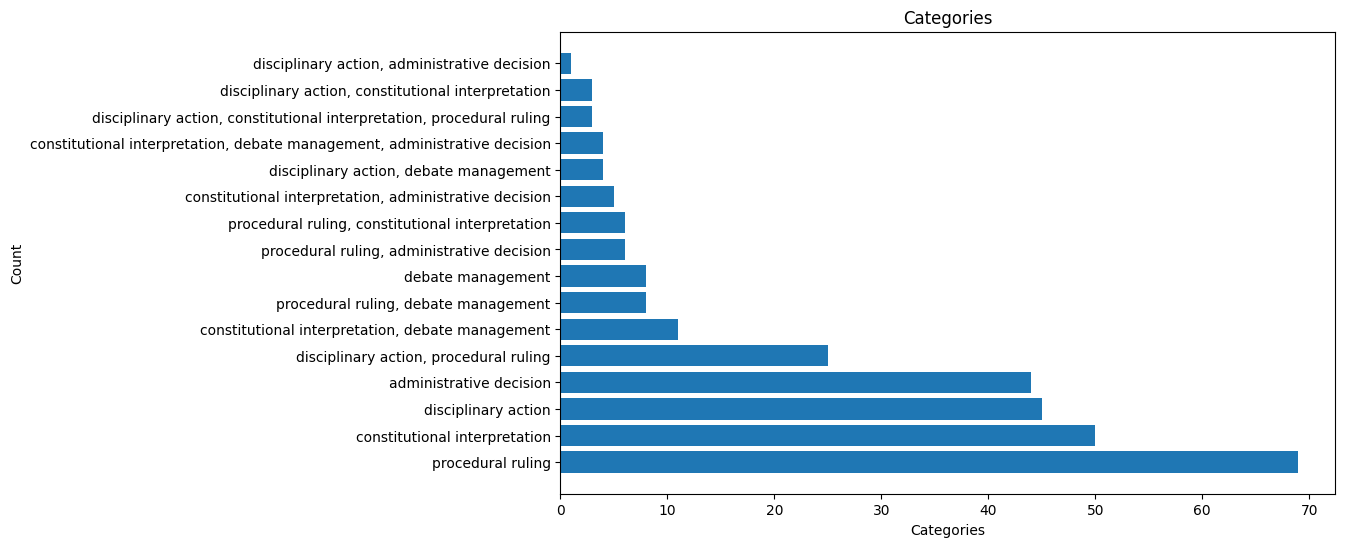

In [ ]:
# creating bar chart for categories column

categoriesCount = ruling_df['categories'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Categories")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.barh(categoriesCount.index, categoriesCount.values)
plt.show()

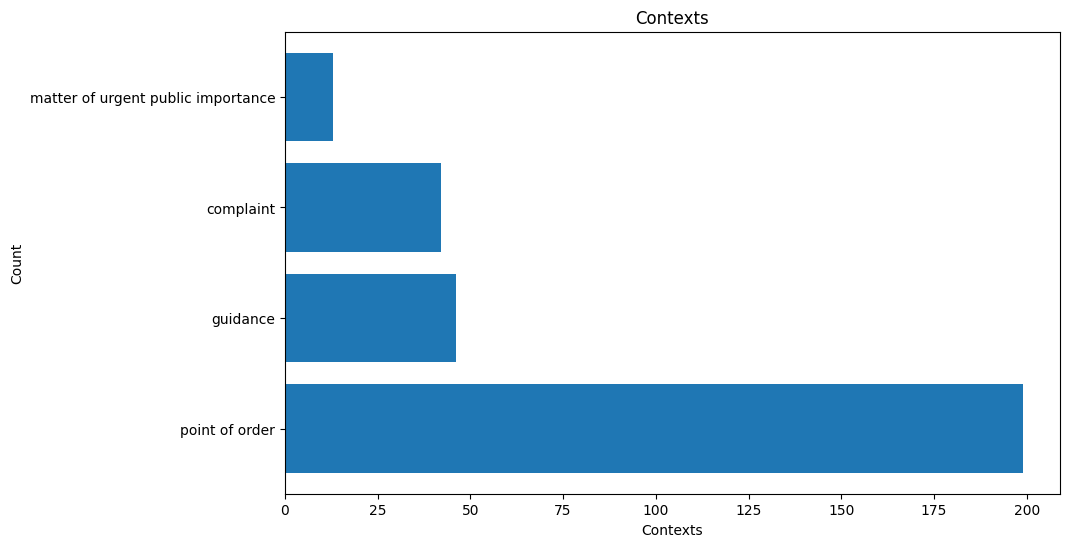

In [ ]:
# creating bar chart for context column

contextCount = ruling_df['context'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Contexts")
plt.xlabel("Contexts")
plt.ylabel("Count")

plt.barh(contextCount.index, contextCount.values)
plt.show()


###**Feature relevance assessment**
Based on the understand and research made upon the dataset

we have identified that

**Most important features:**
>*  **rulingText:** This is the main body of the ruling, containing the richest semantic and contextual information.
>* ***context*** is very noisy it might contribute little.
>* ***categories*** This is meant to be the target column

**Less relevant / redundant features**
>* ***rulingTitle*** might be redundatant because it may be repetitive or just rephrasing the ***rulingText*** but nonetheless it can prove usefull when ***rulingText*** is not usefull
>* ***standingOrder:*** this is potentially usefull but sparse, it contains values like 179, 53, 4 ...



#**Data Preparation**
This seciton performs the Data Preparation phase for our parliamentary Speaker's Rulings classification project.

Following the CRISP-DM methodology, this phase is critical as it directly impacts the quality of our model.

##**Goals of Data Preparation Phase**

* Data Selection: Choose relevant  features for multi-label classification
* Data Preprocessing: Clean and normalize text data for TF-IDF processing
* Data Transformation: Create model-ready features for Logistic Regression
* Multi-label Preparation: Transform categories for multi-label classification

##1. Environment Setup and Data Loading

This section is mean for setting up the preparation environment such as

* Importing the necessary libraries
> * ***pandas***
> * ***pyplot***
> * ***seaborn***
> * ***numpy***
> * ***re(regular expressions)***
> * ***nltk***

* Downloading the necesary packages such as:
> * ***punkt***
> * ***stopwors***

* Setting up to use a copy of the data set






In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import string

# Download necessary NLTK data for text preprocessing
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##2.DATA SELECTION AND CLEANING

Based on our business and  understanding we will select the most relevant features.

The Dataset has the following features:

> * **rulingTitle**
> * **rulingText**
> * **context**
> * **categories**(Target column)
> * **standingOrder**

Selected relevant columns:

> * **rulingText**(merged with ruling title)
> * **context**
> * **categories**(Target column)
> * **standingOrder**

k

In [ ]:
# Create working copy to preserve original data
working_df = ruling_df.copy()

###2.1 Checking and Handling duplicates

In [ ]:
#this part checks and handles duplicates by the rulingText since its te primary column

duplicate_rows = working_df['rulingText'].duplicated().sum()

print(f"Number of duplicates based on rulingText:{duplicate_rows}" )



Number of duplicates based on rulingText:21


In [ ]:
#removing the duplicates
working_df.drop_duplicates(subset=['rulingText'], inplace=True)


In [ ]:
#checking the number of dublicate based on all features after removing
duplicate_rows = working_df['rulingText'].duplicated().sum()

print(f"Number of duplicates after removing dublicates:{duplicate_rows}" )

Number of duplicates after removing dublicates:0


###2.2 Merging rulling text with the title
This section merges the rullingTitle and the rulingText by merging where title exists and filling with title where ruling text is missing

In [ ]:

# Combine rulingTitle and rulingText into a single column
# If rulingTitle is missing, just use rulingText, if rulingText is missing, just use rulingTitle
working_df['rulingText'] = (
    working_df['rulingTitle'].fillna('') + ' ' + working_df['rulingText'].fillna('')
).str.strip()


#Drop rulingTitle
working_df = working_df.drop(columns=['rulingTitle'])


In [ ]:
#checking if the merge was successful

working_df["rulingText"].iloc[4]

"RULING ON ARTICLE 63 MOTIONS OF CENSURE AND EXECUTIVE ACCOUNTABILITY A Point of Order sought to restrict a motion of censure as being unconstitutional. The Constitution recognises Parliament's authority to hold the Executive to account through motions. Standing Orders may regulate form and timing but cannot extinguish the constitutional mechanism. The motion is admitted if it meets form and notice requirements. Censure debates must remain focused on policy, performance, and legality, avoiding imputations of improper motives without evidence. The Government is entitled to respond fully, and the House will vote based on the merits. This preserves a vital tool of democratic accountability while maintaining fairness and order. The motion serves as a constitutional check on executive power and ensures ministerial responsibility to Parliament. The Chair will ensure that censure motions are properly substantiated with specific allegations and supporting evidence, preventing frivolous or poli

###2.3 Checking and Handling missing values

In [ ]:
#missing valie columns and their count
missing_values_count = working_df.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

print(f"missing values before handling: {missing_values_count}")


missing values before handling: categories        7
standingOrder    24
dtype: int64


In [ ]:
working_df.shape

(279, 6)

In [ ]:
#all categories that are missing are to  be droped
working_df.dropna(subset=['categories'], inplace=True);

#all missing standing orders to be replaced with NaN

working_df.fillna({'standingOrder': 'NaN'}, inplace=True)

#reseting index to be continuous
working_df.reset_index(drop=True, inplace=True)

In [ ]:
#7 rows must disapear
working_df.shape

(272, 6)

#3.Text Preprocessing
This section preprocess the ruling text by creating a preprocessing pipline

In [ ]:
def fxn_convert_to_lowercase(var_text):
    return var_text.lower()

def fxn_remove_punctuation(var_text):
    return "".join([var_char for var_char in var_text if var_char not in string.punctuation])

def fxn_remove_stopwords(var_text):
    var_tokens = word_tokenize(var_text)
    var_stop_words = set(stopwords.words('english'))
    var_filtered_tokens = [var_word for var_word in var_tokens if var_word not in var_stop_words]
    return " ".join(var_filtered_tokens)

def fxn_stem_text(var_text):
    var_tokens = word_tokenize(var_text)
    var_stemmer = PorterStemmer()
    var_stemmed_tokens = [var_stemmer.stem(var_word) for var_word in var_tokens]
    return " ".join(var_stemmed_tokens)

def fxn_remove_numbers(var_text):
    return ''.join([i for i in var_text if not i.isdigit()])


def fxn_preprocess_text_pipeline(var_text):
    if not isinstance(var_text, str):
        return ""
    var_processed_text = fxn_convert_to_lowercase(var_text)
    var_processed_text = fxn_remove_punctuation(var_processed_text)
    var_processed_text = fxn_remove_stopwords(var_processed_text)
    var_processed_text = fxn_stem_text(var_processed_text)
    var_processed_text = fxn_remove_numbers(var_processed_text)
    return var_processed_text

working_df['rulingText'] = working_df['rulingText'].apply(fxn_preprocess_text_pipeline)
print("--- Text Pre-processing Complete ---")
working_df['rulingText'].iloc[4]

--- Text Pre-processing Complete ---


'rule articl  motion censur execut account point order sought restrict motion censur unconstitut constitut recognis parliament author hold execut account motion stand order may regul form time extinguish constitut mechan motion admit meet form notic requir censur debat must remain focus polici perform legal avoid imput improp motiv without evid govern entitl respond fulli hous vote base merit preserv vital tool democrat account maintain fair order motion serv constitut check execut power ensur ministeri respons parliament chair ensur censur motion properli substanti specif alleg support evid prevent frivol polit motiv attack motion lack suffici particular chair may requir amend admiss debat must conduct due respect digniti hous presumpt good faith allow robust scrutini execut conduct balanc ensur effect oversight without undermin stabil govern public confid democrat institut'

#4 Categorical Encoding

For the section will perform muilti hot encodin for our three categorical columns which are ***categories*** , ***context*** and ***standing order***

first is to understand this data,how it looks like and figure out the best way to encode it for the model to work with




##4.1 Understnading the categorical columns

In [ ]:
#getting unique values from categories
value_count = working_df['categories'].value_counts()

print("Uniques categories and their frequencies")
print(value_count)

Uniques categories and their frequencies
categories
procedural ruling                                                            65
constitutional interpretation                                                50
administrative decision                                                      44
disciplinary action                                                          36
disciplinary action, procedural ruling                                       25
constitutional interpretation, debate management                              8
debate management                                                             8
procedural ruling, constitutional interpretation                              6
procedural ruling, administrative decision                                    6
procedural ruling, debate management                                          6
constitutional interpretation, administrative decision                        5
disciplinary action, debate management                              

In [ ]:
#getting unique values from categories
value_count = working_df['context'].value_counts()

print("Uniques context and their frequencies")
print(value_count)

Uniques context and their frequencies
context
point of order                        188
guidance                               38
complaint                              34
matter of urgent public importance     12
Name: count, dtype: int64


In [ ]:
#getting unique values from standing order
value_count = working_df['standingOrder'].value_counts()

print("Uniques standing Orders and their frequencies")
print(value_count)

Uniques standing Orders and their frequencies
standingOrder
139                  54
NaN                  23
65                   22
53                    8
223                   7
                     ..
185                   1
185, 196              1
27                    1
187, 202              1
135, 51, 135, 135     1
Name: count, Length: 120, dtype: int64


its very clear that the categories and the standingOrders are comma seperated and for proper encoding we will need to convert these into a list

#4.2 Converting the raw comma seperated text to a list

In [ ]:
#converting categories to list for easir working
working_df['categories'] = working_df['categories'].apply(
    lambda x: [cat.strip() for cat in x.split(',')] if isinstance(x , str) else []
)

print("\n--- After Converting to Lists ---")
print(working_df['categories'])


--- After Converting to Lists ---
0      [constitutional interpretation, administrative...
1                        [constitutional interpretation]
2      [constitutional interpretation, debate managem...
3               [disciplinary action, procedural ruling]
4                        [constitutional interpretation]
                             ...                        
267       [disciplinary action, administrative decision]
268                                  [procedural ruling]
269                                [disciplinary action]
270                            [administrative decision]
271                                  [procedural ruling]
Name: categories, Length: 272, dtype: object


In [ ]:
# converting standingOrder to list, ensuring the string "NaN" becomes []
working_df['standingOrder'] = working_df['standingOrder'].apply(
    lambda x: [] if isinstance(x , str) and x.strip().lower() == 'nan'
              else [cat.strip() for cat in x.split(',')] if isinstance(x , str)
              else []
)

print("\n--- After Converting to Lists ---")
print(working_df['standingOrder'])






--- After Converting to Lists ---
0                     [139]
1                  [72, 72]
2                     [139]
3      [202, 208, 204, 205]
4                     [139]
               ...         
267                   [203]
268                    [65]
269                    [53]
270              [187, 202]
271     [135, 51, 135, 135]
Name: standingOrder, Length: 272, dtype: object


In [ ]:
working_df.columns

Index(['rulingText', 'context', 'categories', 'standingOrder',
       'ruling_title_text_length', 'ruling_title_word_count'],
      dtype='object')

#Categorical Encoding

This section will encode the categorical columns
* The ***categories*** and the ***standingOrder*** will recieve multi hot encoding because one record and belong to multiple of them
* The context since has only one instance per record will recieve one hot encoding

In [ ]:
# Use MultiLabelBinarizer from scikit learn to perform Multi-Hot Encoding on categories
from sklearn.preprocessing import MultiLabelBinarizer


# Multi-label encoding for categories
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(working_df['categories'])
category_names = mlb.classes_
# Add prefix to column names and ensure integer type
category_encoded_df = pd.DataFrame(encoded, columns=[f'category_{col}' for col in category_names]).astype(int)
working_df = working_df.drop(columns=['categories']).join(category_encoded_df)



In [ ]:
encoded

array([[1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [ ]:
category_encoded_df

,category_administrative decision,category_constitutional interpretation,category_debate management,category_disciplinary action,category_procedural ruling
0,1,1,0,0,0
1,0,1,0,0,0
2,0,1,1,0,0
3,0,0,0,1,1
4,0,1,0,0,0
...,...,...,...,...,...
267,1,0,0,1,0
268,0,0,0,0,1
269,0,0,0,1,0
270,1,0,0,0,0


In [ ]:
working_df.columns

Index(['rulingText', 'context', 'standingOrder', 'ruling_title_text_length',
       'ruling_title_word_count', 'category_administrative decision',
       'category_constitutional interpretation', 'category_debate management',
       'category_disciplinary action', 'category_procedural ruling'],
      dtype='object')

In [ ]:
# Use MultiLabelBinarizer from scikit learn to perform Multi-Hot Encoding on standing orders and ignoring the NaN
from sklearn.preprocessing import MultiLabelBinarizer

# Multi-label encoding for standing orders
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(working_df['standingOrder'])

# Add prefix to column names and ensure integer type
encoded_df = pd.DataFrame(encoded, columns=[f'SO_{col}' for col in mlb.classes_]).astype(int)
working_df = working_df.drop(columns=['standingOrder']).join(encoded_df)



In [ ]:
working_df.columns

Index(['rulingText', 'context', 'ruling_title_text_length',
       'ruling_title_word_count', 'category_administrative decision',
       'category_constitutional interpretation', 'category_debate management',
       'category_disciplinary action', 'category_procedural ruling', 'SO_1',
       'SO_11', 'SO_121', 'SO_125', 'SO_131', 'SO_132', 'SO_134', 'SO_135',
       'SO_139', 'SO_140', 'SO_141', 'SO_145', 'SO_148', 'SO_15', 'SO_160',
       'SO_165', 'SO_179', 'SO_185', 'SO_186', 'SO_187', 'SO_188', 'SO_189',
       'SO_19', 'SO_190', 'SO_191', 'SO_192', 'SO_193', 'SO_194', 'SO_195',
       'SO_196', 'SO_197', 'SO_198', 'SO_199', 'SO_200', 'SO_201', 'SO_202',
       'SO_203', 'SO_204', 'SO_205', 'SO_207', 'SO_208', 'SO_210', 'SO_213',
       'SO_215', 'SO_220', 'SO_223', 'SO_226', 'SO_23', 'SO_231', 'SO_243',
       'SO_25', 'SO_26', 'SO_27', 'SO_28', 'SO_3', 'SO_33', 'SO_34', 'SO_35',
       'SO_4', 'SO_44', 'SO_49', 'SO_5', 'SO_51', 'SO_53', 'SO_54', 'SO_57',
       'SO_63', 'SO_65',

In [ ]:
#performing one hot encodin for the context
encoder = OneHotEncoder(sparse_output=False)
context_encoded = encoder.fit_transform(working_df[['context']])
context_encoded_df = pd.DataFrame(context_encoded, columns=encoder.get_feature_names_out(['context'])).astype(int)
working_df = pd.concat([working_df, context_encoded_df], axis=1)
working_df = working_df.drop(columns=['context'])


In [ ]:
working_df.head(5).T


,0,1,2,3,4
rulingText,rule honour speaker point order concern consti...,rule hon madam speaker applic articl social m...,rule honour speaker point order alleg infring ...,rule hon madam first deputi speaker complaint ...,rule articl motion censur execut account poin...
ruling_title_text_length,150,98,127,770,68
ruling_title_word_count,19,16,20,129,10
category_administrative decision,1,0,0,0,0
category_constitutional interpretation,1,1,1,0,1
...,...,...,...,...,...
SO_89,0,0,0,0,0
context_complaint,0,0,0,1,0
context_guidance,0,1,0,0,0
context_matter of urgent public importance,0,0,0,0,0


now the Categorical encoding is done this is how the data set look all together

# 4 Text Transformation

In this step, we convert textual data into numerical representations using **Bag of Words (BoW)** and **TF-IDF**.  
We will prepare the dataset with both approaches, train the model, and then compare their accuracy to determine which performs better.  


###4.1 Data Preparation using Bag Of Words

In [ ]:
#bag or words using count vectorizer
#creating a copy for the BOW dataframe
bow_encoded_df = working_df.copy()

#getting the vectorizer object
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(bow_encoded_df['rulingText'])
bow_encoded_text_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())






###4.2 Data Preparation using TF-IDF

In [ ]:

#bag or words using count vectorizer
tfidf_encoded_df = working_df.copy()

#getting the vectorizer object
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tfidf_encoded_df['rulingText'])
tfidf_encoded_text_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())









In [ ]:
tfidf_encoded_text_df.head(5)

,ab,ababa,abalati,abandon,abbrevi,abdic,abid,abil,abl,abolish,...,zesco,zfe,zimbabwean,zmsc,zmw,znbc,zr,zulu,zx,être
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.024382,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.023103,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036313,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# 7. Data Preparation Summary

## What We Accomplished

### Data Selection
- Selected relevant columns for multi-label text classification  

### Quality Assessment
- Identified and handled missing values, duplicates  

### Text Preprocessing
- Merged ruling titles and text for comprehensive content  
- Implemented complete NLP pipeline:
  - Lowercasing  
  - Punctuation removal  
  - Stopword removal  
  - removal of digits
  - Stemming  

### Multi-label Preparation
- Parsed category strings, standing Order into lists  
- Applied multi-label binarization for target variables and standing orders  


### Vectorization Preparation
- Prepare the rulingText in two ways, using TF-IDF and BoW
- Both datasets will be used to train the model and see on yeilds a greater accuracy   


## Key Outputs
- **Text Corpus**: Clean, processed text ready for TF-IDF vectorization  
- **Multi-label Targets**:Multi hot encoding for all categories, standing Orders  
- **One hot encoded feature**: One hot encoding for the context feature   
- **Bag of Words matrix dataset**: dataset prepared using data BoW
- **TF-IDF matrix dataset**:  dataset prepared using data Tf-idf   




#**Modeling**

In this phase, we focus on building predictive models using the data representations prepared during the **Data Preparation** stage.  
Since our problem is **multi-label text classification**, we will experiment with different feature extraction methods and classification algorithms, then evaluate their performance.

### Feature Representations
We prepared the textual data using two common encoding techniques:
- **Bag of Words (BoW):** Represents text as word occurrence counts.
- **TF-IDF (Term Frequency – Inverse Document Frequency)**

### Modeling Algorithms
To capture both linear and non-linear decision boundaries, we will train and evaluate two models:
1. **Logistic Regression (One-vs-Rest):**  
2. **Random Forest (One-vs-Rest):**  
  

### Objective
For this project, we streamline the workflow by **training and evaluating models in the same step**.  
Each model (Logistic Regression and Random Forest) is trained on both text representations, and its performance is assessed using standard multi-label metrics such as:

- **Classification Report** (Precision, Recall, F1-score, Support)  
- **Hamming Loss**  
- **Jaccard Score (micro and macro)**  
- **Confusion Matrices** for deeper error analysis  

This approach allows us to directly compare model effectiveness across different data representations and identify the best-performing combination for our task.


In [ ]:
#importing necessary dataset
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix, hamming_loss, jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

#Using BoW encoded dataset
We assign the Bag-of-Words encoded features as `X` and the multi-label categories as `y` for modeling.


In [ ]:
#Assing the independent featuer and the target lable
X = bow_encoded_text_df  #this is the independedn features
y = category_encoded_df  #this is the target label dataset

The dataset is split into training (70%) and testing (30%) sets to evaluate model performance on unseen data.


In [ ]:
#Test/Train Split ]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3, random_state=42
)

###Train a **One-vs-Rest Logistic Regression model** on BoW features to handle multi-label classification.


In [ ]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train , y_train)
#predict the daa using the training X data
y_pred =  model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))

                               precision    recall  f1-score   support

      administrative decision       1.00      1.00      1.00        16
constitutional interpretation       0.96      0.88      0.92        26
            debate management       0.86      0.86      0.86         7
          disciplinary action       0.92      0.46      0.61        24
            procedural ruling       0.85      0.72      0.78        32

                    micro avg       0.92      0.75      0.83       105
                    macro avg       0.92      0.78      0.83       105
                 weighted avg       0.92      0.75      0.81       105
                  samples avg       0.89      0.81      0.83       105

Hamming Loss: 0.08048780487804878
Jaccard Score (micro): 0.7053571428571429
Jaccard Score (macro): 0.7361481481481482


###Logistic Regression is trained with balanced class weights to address label imbalance in the dataset.


In [ ]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression using class_weight='balanced'

model = OneVsRestClassifier(LogisticRegression(max_iter=1000 ,class_weight='balanced'))
model.fit(X_train , y_train)

#predict the daa using the training X data
y_pred =  model.predict(X_test)


print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))




                               precision    recall  f1-score   support

      administrative decision       1.00      1.00      1.00        16
constitutional interpretation       0.92      0.88      0.90        26
            debate management       0.75      0.86      0.80         7
          disciplinary action       0.92      0.50      0.65        24
            procedural ruling       0.85      0.72      0.78        32

                    micro avg       0.90      0.76      0.82       105
                    macro avg       0.89      0.79      0.83       105
                 weighted avg       0.90      0.76      0.81       105
                  samples avg       0.88      0.82      0.83       105

Hamming Loss: 0.08292682926829269
Jaccard Score (micro): 0.7017543859649122
Jaccard Score (macro): 0.7213968253968254


#Trying a different different Dataset RandomForestClassifier
We now experiment with a tree-based ensemble model to capture non-linear patterns in the text data.


###A standard Random Forest classifier is trained with One-vs-Rest for multi-label prediction without weighting.


In [ ]:
rf_model = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=200,      # number of trees
        max_depth=None,        # expand until pure or min_samples
        random_state=42,
        n_jobs=-1              # use all cores
    )
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))



                               precision    recall  f1-score   support

      administrative decision       1.00      0.56      0.72        16
constitutional interpretation       1.00      0.62      0.76        26
            debate management       1.00      0.29      0.44         7
          disciplinary action       0.73      0.33      0.46        24
            procedural ruling       0.81      0.91      0.85        32

                    micro avg       0.86      0.61      0.72       105
                    macro avg       0.91      0.54      0.65       105
                 weighted avg       0.88      0.61      0.69       105
                  samples avg       0.70      0.66      0.66       105

Hamming Loss: 0.12439024390243902
Jaccard Score (micro): 0.5565217391304348
Jaccard Score (macro): 0.5006969881969882


###Logistic Regression is trained with balanced class weights to address label imbalance in the dataset.


In [ ]:
rf_model = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=200,      # number of trees
        max_depth=None,        # expand until pure or min_samples
             class_weight="balanced",
        random_state=42,
        n_jobs=-1              # use all cores
    )
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))


                               precision    recall  f1-score   support

      administrative decision       1.00      0.69      0.81        16
constitutional interpretation       1.00      0.73      0.84        26
            debate management       1.00      0.29      0.44         7
          disciplinary action       0.78      0.29      0.42        24
            procedural ruling       0.83      0.91      0.87        32

                    micro avg       0.89      0.65      0.75       105
                    macro avg       0.92      0.58      0.68       105
                 weighted avg       0.90      0.65      0.72       105
                  samples avg       0.76      0.72      0.73       105

Hamming Loss: 0.10975609756097561
Jaccard Score (micro): 0.6017699115044248
Jaccard Score (macro): 0.5472744360902255


#Using TF-IDF encoded dataset
We assign the TF-IDF encoded features as `X` and the multi-label categories as `y` for modeling.


In [ ]:
#Assing the independent featuer and the target lable
X = tfidf_encoded_text_df  #this is the independedn features
y = category_encoded_df  #this is the target label dataset

The dataset is split into training (70%) and testing (30%) sets to evaluate model performance on unseen data.


In [ ]:
#Test/Train Split ]
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3, random_state=42
)

###Using Logistic Regression

Train the  One-vs-Rest Logistic Regression model on TF-IDF features to handle multi-label classification.


In [ ]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train , y_train)
#predict the daa using the training X data
y_pred =  model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))

                               precision    recall  f1-score   support

      administrative decision       1.00      0.25      0.40        16
constitutional interpretation       1.00      0.42      0.59        26
            debate management       0.00      0.00      0.00         7
          disciplinary action       1.00      0.04      0.08        24
            procedural ruling       0.80      0.75      0.77        32

                    micro avg       0.87      0.38      0.53       105
                    macro avg       0.76      0.29      0.37       105
                 weighted avg       0.87      0.38      0.46       105
                  samples avg       0.47      0.42      0.43       105

Hamming Loss: 0.17317073170731706
Jaccard Score (micro): 0.36036036036036034
Jaccard Score (macro): 0.26926450742240216


###Logistic Regression is trained with balanced class weights to address label imbalance in the TF-IDF data.


In [ ]:
#train the Model
#looking at the fact that our data is multi labled we will use One-vs-Rest Logistic Regression using class_weight='balanced'

model = OneVsRestClassifier(LogisticRegression(max_iter=1000 ,class_weight='balanced'))
model.fit(X_train , y_train)

#predict the daa using the training X data
y_pred =  model.predict(X_test)


print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))




                               precision    recall  f1-score   support

      administrative decision       0.76      1.00      0.86        16
constitutional interpretation       0.80      0.92      0.86        26
            debate management       0.88      1.00      0.93         7
          disciplinary action       0.65      0.62      0.64        24
            procedural ruling       0.81      0.78      0.79        32

                    micro avg       0.77      0.83      0.80       105
                    macro avg       0.78      0.87      0.82       105
                 weighted avg       0.77      0.83      0.79       105
                  samples avg       0.81      0.87      0.81       105

Hamming Loss: 0.1073170731707317
Jaccard Score (micro): 0.6641221374045801
Jaccard Score (macro): 0.7027098997493735


#Trying a different different Dataset RandomForestClassifier


We now experiment with a Random Forest model to capture non-linear relationships in TF-IDF features.


###A standard Random Forest classifier is trained with One-vs-Rest for multi-label prediction on TF-IDF features.


In [ ]:
rf_model = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=200,      # number of trees
        max_depth=None,        # expand until pure or min_samples
        random_state=42,
        n_jobs=-1              # use all cores
    )
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))



                               precision    recall  f1-score   support

      administrative decision       1.00      0.75      0.86        16
constitutional interpretation       0.95      0.73      0.83        26
            debate management       1.00      0.29      0.44         7
          disciplinary action       1.00      0.21      0.34        24
            procedural ruling       0.81      0.91      0.85        32

                    micro avg       0.89      0.64      0.74       105
                    macro avg       0.95      0.58      0.67       105
                 weighted avg       0.93      0.64      0.70       105
                  samples avg       0.77      0.71      0.73       105

Hamming Loss: 0.11219512195121951
Jaccard Score (micro): 0.5929203539823009
Jaccard Score (macro): 0.5382682132682133


###Random Forest is trained with balanced class weights to improve prediction on minority labels in TF-IDF data.




In [ ]:
rf_model = OneVsRestClassifier(
    RandomForestClassifier(
        n_estimators=200,      # number of trees
        max_depth=None,        # expand until pure or min_samples
             class_weight="balanced",
        random_state=42,
        n_jobs=-1              # use all cores
    )
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=category_names ,     zero_division=0))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Jaccard Score (micro):", jaccard_score(y_test, y_pred, average="micro"))
print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average="macro"))


                               precision    recall  f1-score   support

      administrative decision       1.00      0.75      0.86        16
constitutional interpretation       1.00      0.69      0.82        26
            debate management       1.00      0.29      0.44         7
          disciplinary action       1.00      0.38      0.55        24
            procedural ruling       0.81      0.91      0.85        32

                    micro avg       0.91      0.67      0.77       105
                    macro avg       0.96      0.60      0.70       105
                 weighted avg       0.94      0.67      0.75       105
                  samples avg       0.79      0.73      0.75       105

Hamming Loss: 0.1024390243902439
Jaccard Score (micro): 0.625
Jaccard Score (macro): 0.5693223443223443
